In [79]:
# load dataset 
# handle missing value 
# feature selection [try all feature selection methods]
# choose appropriate model [random forest [ensemble learning]]
# hyperparameter tuning [grid search ... ]
# choose the best parameters
# evaluate model 


In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings

np.random.seed(42)
warnings.simplefilter("ignore")

In [81]:
# titanic_url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_data = pd.read_csv("train.csv")

In [82]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [83]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Filter Methods

In [84]:
# chi square 
# pearsons correlation 
numerical_features = titanic_data.select_dtypes(include=['float64', 'int64']).columns
categorical_features = titanic_data.select_dtypes(include=['object']).columns

In [85]:
numerical_features

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [86]:
categorical_features

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

## Correlation for Numerical Features

In [87]:
import seaborn as sns

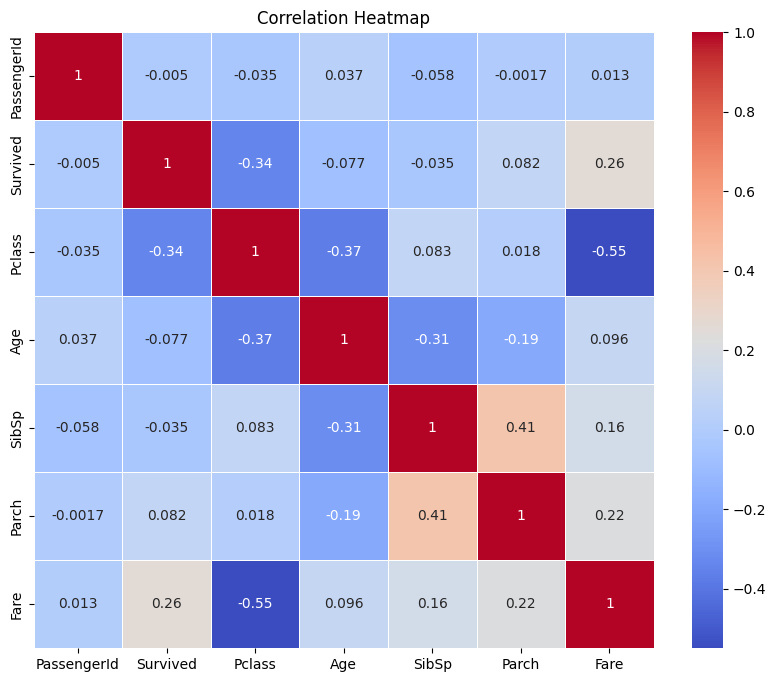

In [88]:
# heat map
correlation_matrix = titanic_data[numerical_features].corr()
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [89]:
correlation_threshold = 0.05  # Adjust the threshold as needed

In [90]:
correlation_with_survived = correlation_matrix['Survived'].abs()
correlation_with_survived

PassengerId    0.005007
Survived       1.000000
Pclass         0.338481
Age            0.077221
SibSp          0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

In [91]:
correlation_with_survived[correlation_with_survived > correlation_threshold].index.tolist()

['Survived', 'Pclass', 'Age', 'Parch', 'Fare']

In [92]:

highly_correlated_features = correlation_with_survived[correlation_with_survived > correlation_threshold].index.tolist()

highly_correlated_features

['Survived', 'Pclass', 'Age', 'Parch', 'Fare']

`PassengerID` column has correlation to the target less than threshold

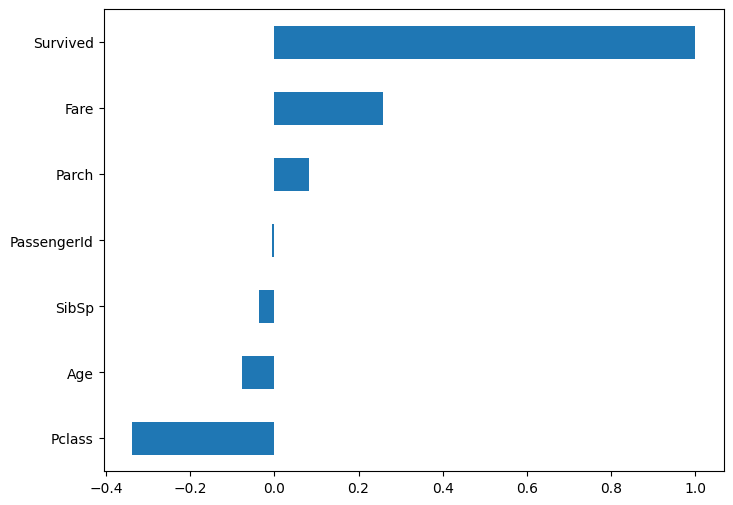

In [93]:
correlation_matrix['Survived'].sort_values().plot(kind="barh", figsize=(8, 6));

## Missing Value Ratio

In [94]:
missing_value_ratio_threshold = 0.4

In [95]:
titanic_data.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [96]:

missing_value_ratios = titanic_data.isnull().mean()

In [97]:

missing_value_ratios = titanic_data.isnull().mean()
columns_to_drop = missing_value_ratios[missing_value_ratios > missing_value_ratio_threshold].index.tolist()

columns_to_drop

['Cabin']

`Cabin` column has nulls above 40% our threshold, we need to handle this in appreciate way!

## Chi-Square for Categorical Features

we usually use Chi-Sqaure with categorical features

In [98]:
le = LabelEncoder()
print(le.fit(["paris", "paris", "tokyo", "amsterdam"]))
print("====================================================")
print(list(le.classes_))
print("====================================================")
print(le.transform(["tokyo", "tokyo", "paris"]))
print("====================================================")
print(list(le.inverse_transform([2, 2, 1])))

LabelEncoder()
['amsterdam', 'paris', 'tokyo']
[2 2 1]
['tokyo', 'tokyo', 'paris']


In [99]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [100]:
label_encoder = LabelEncoder()
for feature in categorical_features:
    titanic_data[feature] = label_encoder.fit_transform(titanic_data[feature].astype(str))
    
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,147,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,147,2
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.0,0,0,472,8.0500,147,2


In [101]:
#This applies the Chi-Square test for independence on each categorical feature and the target variable ('Survived').
#It returns two values:
#chi2_stats: The chi-square statistic for each feature.
#chi2_p_values: The p-values for each feature, indicating whether the association is statistically significant.
chi2_stats, chi2_p_values = chi2(titanic_data[categorical_features], titanic_data['Survived'])
chi2_stats

array([ 435.5689145 ,   92.70244698, 2871.65546583,  573.92585774,
          9.75545583])

In [102]:
chi2_p_values

array([9.97314604e-097, 6.07783826e-022, 0.00000000e+000, 7.85854612e-127,
       1.78791305e-003])

In [103]:
significant_chi2_features = [feature for feature, p_value in zip(categorical_features, chi2_p_values) if p_value < 0.05]
significant_chi2_features

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

`Name` column is not relevant with the target 

# Wrapper Methods

A wrapper method is a feature selection technique used in machine learning to select a subset of features that are most predictive of the target variable. Unlike filter methods (which rely on statistical measures like correlation), wrapper methods involve training a model and using its performance as a measure to select or eliminate features.

**Types of Wrapper Methods:**<br>

**Forward Selection:**
* Start with an empty set of features.
* Iteratively add features that improve model performance the most.

**Backward Elimination:**
* Start with all features.
* Iteratively remove the least important features until performance degrades.

**Recursive Feature Elimination (RFE):**
* Use a model (usually a classifier or regressor) to rank features by importance.
* Iteratively remove the least important features and re-evaluate the model until the desired number of features is reached.

In [104]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [105]:
X = titanic_data.drop(['Survived'], axis=1)
y = titanic_data['Survived']

X = X.fillna(X.mean())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Forward Selection

In [106]:
model = LogisticRegression()
rfe_forward = RFE(model, n_features_to_select=5) # controle number of features
rfe_forward

RFE(estimator=LogisticRegression(), n_features_to_select=5)

In [107]:
X_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
331,332,1,637,1,45.500000,0,0,20,28.5000,56,2
733,734,2,84,1,23.000000,0,0,228,13.0000,147,2
382,383,3,811,1,32.000000,0,0,665,7.9250,147,2
704,705,3,326,1,26.000000,1,0,398,7.8542,147,2
813,814,3,23,0,6.000000,4,2,333,31.2750,147,2
...,...,...,...,...,...,...,...,...,...,...,...
106,107,3,724,0,21.000000,0,0,296,7.6500,147,2
270,271,1,125,1,29.699118,0,0,47,31.0000,147,2
860,861,3,325,1,41.000000,2,0,399,14.1083,147,2
435,436,1,143,0,14.000000,1,2,33,120.0000,47,2


In [108]:
y_train

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int64

In [109]:

X_train_forward = rfe_forward.fit_transform(X_train, y_train)

In [110]:
X_train_forward.shape

(712, 5)

In [111]:
X_train_forward

array([[1., 1., 0., 0., 2.],
       [2., 1., 0., 0., 2.],
       [3., 1., 0., 0., 2.],
       ...,
       [3., 1., 2., 0., 2.],
       [1., 0., 1., 2., 2.],
       [1., 1., 0., 1., 2.]])

In [112]:
rfe_forward.feature_names_in_

array(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [113]:
rfe_forward.get_feature_names_out()

array(['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'], dtype=object)

In [114]:
rfe_forward.ranking_

array([4, 1, 7, 1, 2, 1, 1, 6, 3, 5, 1])

with the selected features above the model give us around 80% acc on the training set

# Embedded Methods

**Embedded methods**
are feature selection techniques that perform feature selection during the model training process. Unlike wrapper methods (which iteratively test feature subsets) and filter methods (which are independent of the model), embedded methods select features as part of the model's optimization process. This usually involves algorithms that have built-in feature importance measures, such as decision trees or regularization methods (like Lasso and Ridge regression).

**Common Embedded Methods:**
* Lasso Regression (L1 Regularization)
* Ridge Regression (L2 Regularization)
* Decision Trees and Random Forests
* Gradient Boosting Machines (GBMs)

In [115]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso

In [116]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [117]:
X_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
331,332,1,637,1,45.500000,0,0,20,28.5000,56,2
733,734,2,84,1,23.000000,0,0,228,13.0000,147,2
382,383,3,811,1,32.000000,0,0,665,7.9250,147,2
704,705,3,326,1,26.000000,1,0,398,7.8542,147,2
813,814,3,23,0,6.000000,4,2,333,31.2750,147,2
...,...,...,...,...,...,...,...,...,...,...,...
106,107,3,724,0,21.000000,0,0,296,7.6500,147,2
270,271,1,125,1,29.699118,0,0,47,31.0000,147,2
860,861,3,325,1,41.000000,2,0,399,14.1083,147,2
435,436,1,143,0,14.000000,1,2,33,120.0000,47,2


In [118]:
X_train_scaled

array([[-0.45306593, -1.61413602,  0.71732642, ..., -0.07868358,
        -2.08825118,  0.55744438],
       [ 1.11387354, -0.40055118, -1.43097537, ..., -0.37714494,
         0.44573085,  0.55744438],
       [-0.25427511,  0.81303367,  1.39328395, ..., -0.47486697,
         0.44573085,  0.55744438],
       ...,
       [ 1.60890168,  0.81303367, -0.49473535, ..., -0.35580399,
         0.44573085,  0.55744438],
       [-0.04768856, -1.61413602, -1.20177138, ...,  1.68320121,
        -2.33886479,  0.55744438],
       [-1.34567573, -1.61413602,  1.57587018, ...,  0.86074761,
        -0.91872101,  0.55744438]])

In [119]:
#The alpha value controls the amount of regularization applied to the model. 
# A smaller alpha applies less regularization, while a larger alpha will increase the regularization effect, 
# driving more feature coefficients to zero.
lasso_model = Lasso(alpha=0.01, random_state=42) 
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=0.01, random_state=42)

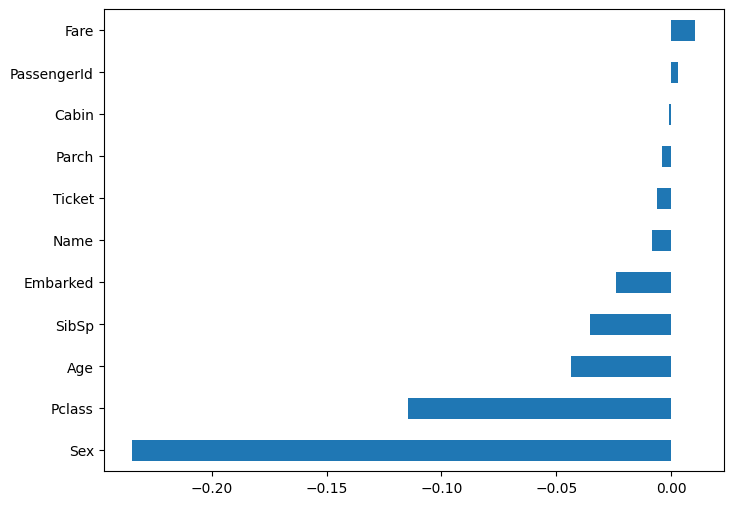

In [120]:
pd.Series(lasso_model.coef_, index=X.columns).sort_values().plot(kind="barh", figsize=(8, 6));

as you can see that `PassengerID`, `Name`, and `Parch` is less coef to the model equation so deleting them will reduce the model complexity and make it easy to interprete

In [121]:
lasso_model.coef_

array([ 0.00288307, -0.11446169, -0.00841537, -0.23488793, -0.04364603,
       -0.03513198, -0.00409522, -0.00592781,  0.01059809, -0.00098148,
       -0.02394951])

In [122]:
lasso_selected_features = X.columns[abs(lasso_model.coef_) > 0.01] # 0.01 is coef threshold
lasso_selected_features

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Embarked'], dtype='object')

In [123]:
X_train_lasso = X_train[lasso_selected_features]
lasso_model.fit(X_train_lasso, y_train)
y_pred_lasso = lasso_model.predict(X_train_lasso)

In [124]:
y_pred_lasso

array([ 0.33689273,  0.28938626,  0.1123027 ,  0.10072721,  0.55184881,
        0.59391547,  0.3379881 ,  0.28102802,  0.12216203,  0.40847912,
        0.67237293,  0.06658797,  0.24607708,  0.13892294,  0.12602681,
        0.6450418 ,  0.84233378,  0.98758873,  0.24217582,  0.90180852,
        0.53038951, -0.01307033,  0.58581573,  0.8297264 ,  0.44468274,
        0.21018074,  0.64123627,  0.12601781,  0.3896724 ,  0.17244817,
        0.03511659,  0.56163374,  0.12052277,  0.8742928 ,  0.14544531,
        0.48429483,  0.13627752,  0.71720476,  0.37775173,  0.75233826,
        0.12181411,  0.12216203,  0.74962639,  0.1417201 ,  0.40578538,
        0.14187431,  0.75043451,  0.15500353,  0.55722832,  0.71934162,
        0.60258584,  0.20919731,  1.00474872,  0.14545878,  0.63308549,
        0.12257509,  0.61967246,  0.73497931,  0.63795333,  0.97042129,
        0.16648818,  0.16382728,  0.64208817,  0.16855124,  0.62873432,
        0.14752227,  0.13031867,  0.12224511,  0.1509137 ,  0.15

In [125]:
accuracy_lasso = accuracy_score(y_train, (y_pred_lasso > 0.5).astype(int))
print("Selected Features:", lasso_selected_features)
print("Model Accuracy:", accuracy_lasso)

Selected Features: Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Embarked'], dtype='object')
Model Accuracy: 0.7949438202247191


## Tree-based Feature Importance (Random Forest)

In [133]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [134]:
pd.Series(rf_model.feature_importances_, index=X.columns)

PassengerId    0.102105
Pclass         0.058809
Name           0.110683
Sex            0.242464
Age            0.103467
SibSp          0.027776
Parch          0.022703
Ticket         0.136582
Fare           0.119962
Cabin          0.054628
Embarked       0.020823
dtype: float64

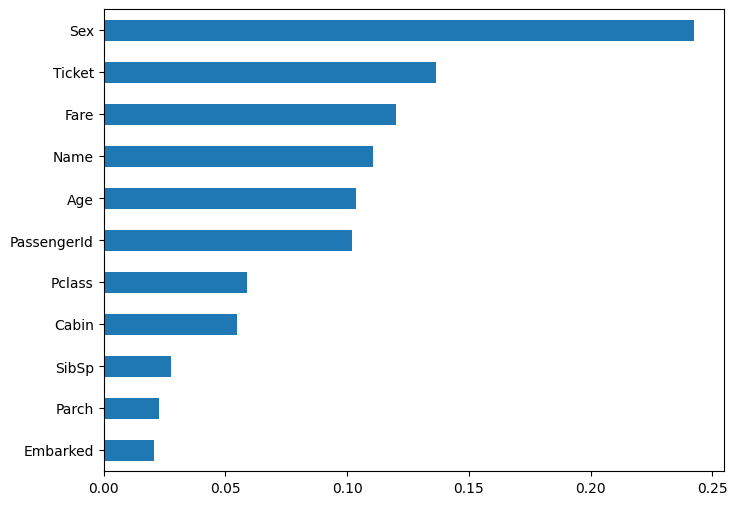

In [135]:
pd.Series(rf_model.feature_importances_, index=X.columns).sort_values().plot(kind="barh", figsize=(8, 6));

In [136]:
# Extract feature importances
feature_importances = rf_model.feature_importances_
feature_importances

array([0.10210521, 0.05880871, 0.11068254, 0.24246403, 0.10346681,
       0.02777567, 0.02270255, 0.13658197, 0.11996167, 0.05462767,
       0.02082317])

In [137]:
# Select features based on importance
tree_based_selected_features = X.columns[feature_importances > 0.05]
tree_based_selected_features

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'Ticket', 'Fare',
       'Cabin'],
      dtype='object')

In [138]:
X_train_tree_based = X_train[tree_based_selected_features]
rf_model.fit(X_train_tree_based, y_train)
y_pred_tree_based = X_train[tree_based_selected_features]

In [139]:
accuracy_tree_based = accuracy_score(y_train, rf_model.predict(X_train[tree_based_selected_features]))

print("\nEmbedded Method 2: Tree-based Feature Importance (Random Forest)")
print("Selected Features:", tree_based_selected_features)
print("Model Accuracy:", accuracy_tree_based)


Embedded Method 2: Tree-based Feature Importance (Random Forest)
Selected Features: Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'Ticket', 'Fare',
       'Cabin'],
      dtype='object')
Model Accuracy: 1.0


In [140]:
accuracy_score(y_test, rf_model.predict(X_test[tree_based_selected_features]))

0.8491620111731844

Stay tuned for updates!